SMP re-exam August 2020
==

In [5]:
# Student number: 266078

In [2]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf.

Assignment 1 (20%)
==

In [ ]:
# a)

x=sp.Symbol('x')
q=sp.Symbol('q')
e=2.7182
f=(1/(e**q)*(e**x))
#Nu stiu exact daca trebuie sa pui si zero sau nu 
F=sp.integrate(f,(x,x,3))
q=sp.solve(F-1,q)
print(q[0])

In [8]:
# b)


In [9]:
# c)


In [10]:
# d)


Assignment 2 (10%)
==

In [83]:
# a)

P_AnotB = 0.3
P_AB = 0.2
P_B = 0.4

# using the law of total probability

P_A = P_AB * P_B + P_AnotB * (1-P_B)
print("P(A | B) = ",P_A)

P(A | B) =  0.26


In [84]:
# b)

# using the conditional probability, we can find P(B | A)

P_BA = (P_AB * P_B) / P_A
print("P(B | A) = ",round(P_BA,2))

P(B | A) =  0.31


In [85]:
# c)

P_AnotB = P_B - (P_AB * P_B) / (1 - P_A)
print("P(B | !A) = ",round(P_AnotB,2))

P(B | !A) =  0.29


Assignment 3 (15%)
==

In [67]:
# a) HyperGeometric

display(Latex("$$P(X \geq 3) = {}$$".format(round(hypergeom.sf(2, 30, 20, 5), 4))))

<IPython.core.display.Math object>

In [81]:
# b) Exponential

l = 5000/60
display(Latex("$$P(X > 100) = {}$$".format(round(expon.sf(100, 0, l), 4))))

<IPython.core.display.Latex object>

In [80]:
# c) Binomial

#It should be 50/50 if they are equally good at the game, but we need to study this

display(Latex("$$P(X = Player A) = {}$$".format(round(nbinom.pmf(2, 6, 0.50), 4))))
display(Latex("$$P(X > 8) = {}$$".format(round(nbinom.cdf(3, 6, 0.50), 4))))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Assignment 4 (20%)
==

In [7]:
# a)

#read from excel file. Careful with the sheet name. It might need changing or not
lifespan = pd.read_excel('lifespan_civil_status.xlsx')
lifespan.head()

#first lets check for outliers
median = lifespan['Married'].median()
std = lifespan['Married'].std() 
outliers = (lifespan['Married'] - median).abs() > 1.5*std 
lifespan['Married'][outliers] = np.nan
 
mean = lifespan['Married'].mean()
lifespan['Married'].fillna(mean, inplace=True) 

median = lifespan['Singles'].median()
std = lifespan['Singles'].std() 
outliers = (lifespan['Singles'] - median).abs() > 1.5*std 
lifespan['Singles'][outliers] = np.nan
 
mean = lifespan['Singles'].mean()
lifespan['Singles'].fillna(mean, inplace=True) 

# we can use describe or to calculate by hand
lifespan.describe()

,Married,Singles
count,100.000000,100.000000
mean,82.014103,78.612660
std,9.842646,11.721568
min,60.390320,55.049100
25%,75.790819,69.438608
50%,82.014103,78.612660
75%,89.653034,87.700052
max,99.754776,100.239811


In [8]:
# Now to make sure the results are correct
Q = np.percentile(lifespan['Married'], [0,25,50,75,100])
display("Quartiles Lifespan Married: ", "Minimum value = " + str(Q[0]), "Lower Quartile (25th percentile) = " + str(Q[1]), "Median (50th percentile) = " + str(Q[2]), "Upper Quartile (75th percentile) = " + str(Q[3]),"Maximum value = " + str(Q[4]))
print('mean', lifespan['Married'].mean())
print('std', lifespan['Married'].std(ddof=1))
print('var', lifespan['Married'].var(ddof=1))

'Quartiles Lifespan Married: '

'Minimum value = 60.39031955976753'

'Lower Quartile (25th percentile) = 75.79081921533238'

'Median (50th percentile) = 82.01410315521645'

'Upper Quartile (75th percentile) = 89.65303374673778'

'Maximum value = 99.7547758689431'

mean 82.01410315521645
std 9.84264593592751
var 96.87767902003033


In [9]:
Q = np.percentile(lifespan['Singles'], [0,25,50,75,100])
display("Quartiles Lifespan Singles: ", "Minimum value = " + str(Q[0]), "Lower Quartile (25th percentile) = " + str(Q[1]), "Median (50th percentile) = " + str(Q[2]), "Upper Quartile (75th percentile) = " + str(Q[3]),"Maximum value = " + str(Q[4]))
print('mean', lifespan['Singles'].mean())
print('std', lifespan['Singles'].std(ddof=1))
print('var', lifespan['Singles'].var(ddof=1))

'Quartiles Lifespan Singles: '

'Minimum value = 55.04909954475303'

'Lower Quartile (25th percentile) = 69.43860799087065'

'Median (50th percentile) = 78.61265979460822'

'Upper Quartile (75th percentile) = 87.70005247385299'

'Maximum value = 100.2398110962515'

mean 78.61265979460818
std 11.721568236352647
var 137.39516191947132


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

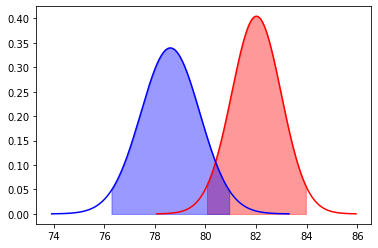

In [14]:
# b)

n10 = len(lifespan['Married'])
m10 = np.mean(lifespan['Married'])
SE10 = stats.sem(lifespan['Married'])
Level = 0.95

CI10 = stats.t.interval(Level, n10-1, loc=m10, scale=SE10)
n20 = len(lifespan['Singles'])
m20 = np.mean(lifespan['Singles'])
SE20 = stats.sem(lifespan['Singles'])

CI20 = stats.t.interval(Level, n20-1, loc=m20, scale=SE20)

display(Latex('A ' + repr(int(Level*100)) + ' % confidence interval for the sample mean of the Lifespan Married is ['+ repr(round(CI10[0],3)) + ' ; ' + repr(round(CI10[1],3)) + ']'))
display(Latex('A ' + repr(int(Level*100)) + ' % confidence interval for the sample mean of the Lifespan Singles is ['+ repr(round(CI20[0],3)) + ' ; ' + repr(round(CI20[1],3)) + ']'))

plt.figure()

x10 = np.linspace(m10-4*SE10, m10+4*SE10, 1000)
z10 = np.linspace(CI10[0], CI10[1], 1000)
y10 = stats.t.pdf(x10,n10-1, m10, SE10)
plt.plot(x10,y10, color = 'red')
plt.fill_between(z10, stats.t.pdf(z10,n10-1, m10,SE10), color = 'red', alpha = 0.4)

x20 = np.linspace(m20-4*SE20, m20+4*SE20, 1000)
z20 = np.linspace(CI20[0], CI20[1], 1000)
y20 = stats.t.pdf(x20,n20-1, m20, SE20)
plt.plot(x20,y20, color = 'blue')
plt.fill_between(z20, stats.t.pdf(z20,n20-1, m20,SE20), color = 'blue', alpha = 0.4)

plt.show()


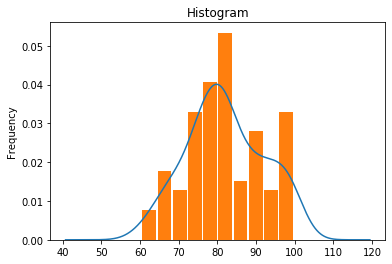

In [15]:
# c)

# to check if could be Normal, we first make some plots
fig, ax = plt.subplots()  
lifespan['Married'].plot.kde(ax=ax, legend=False, title='Histogram')  
lifespan['Married'].plot.hist(density=True, ax=ax, legend=False, rwidth=0.9) 

plt.show()  

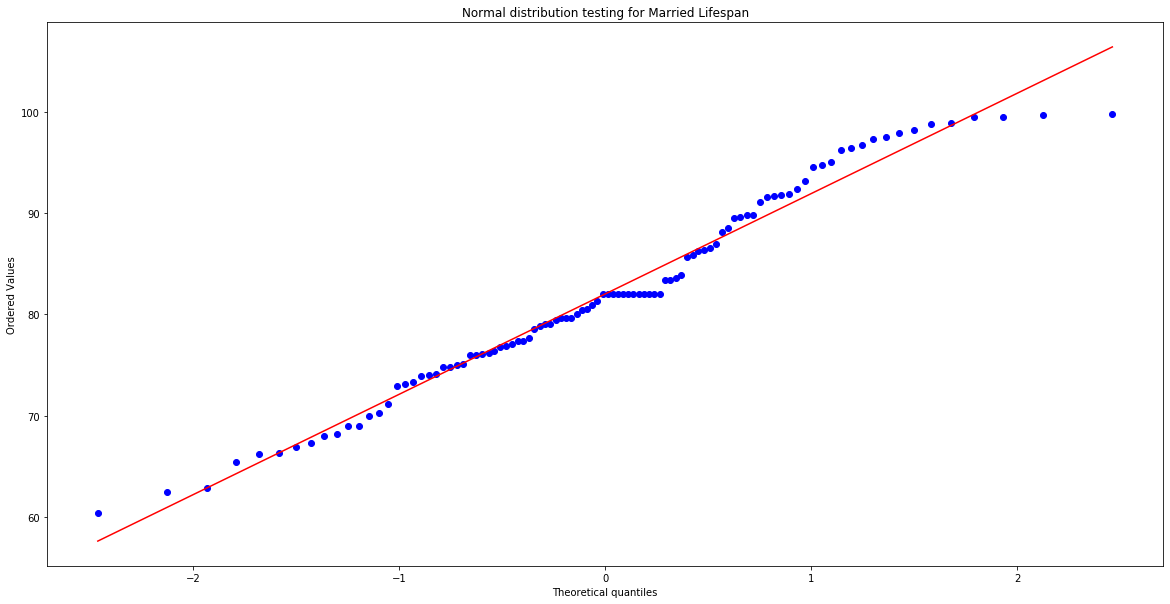

In [30]:
figure, ax = plt.subplots(num=1,figsize=(20,10))
# in dist replace with supposed distribution
stats.probplot(x=lifespan['Married'], plot=ax,dist=stats.norm)
plt.title("Normal distribution testing for Married Lifespan")
plt.show()

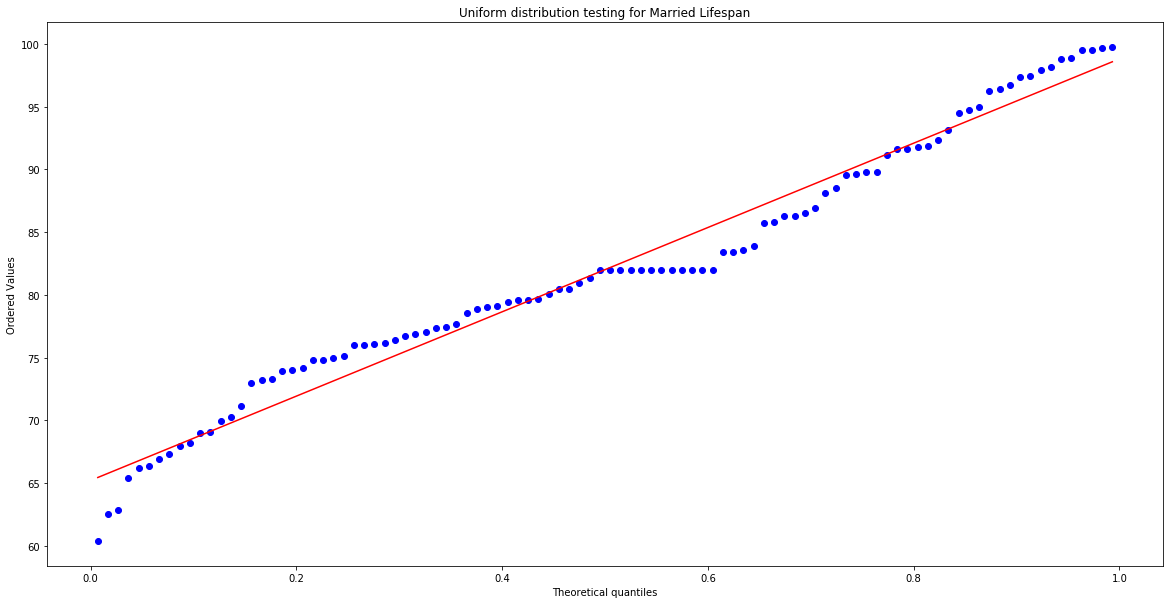

In [31]:
figure, ax = plt.subplots(num=1,figsize=(20,10))
# in dist replace with supposed distribution
stats.probplot(x=lifespan['Married'], plot=ax,dist=stats.uniform)
plt.title("Uniform distribution testing for Married Lifespan")
plt.show()

In [19]:
print('Skewness = ' + str(stats.skew(lifespan['Married'])))  
print('Kurtosis = ' + str(stats.kurtosis(lifespan['Married'])))  
if stats.skew(lifespan['Married'])<0.5 and stats.skew(lifespan['Married'])>-0.5:  
    print("As the skewness is between -0.5 and 0.5 it is not skewed")  
elif stats.skew(lifespan['Married'])<-0.5 :   
    print("As the skewness is less than -0.5 it is negative skewed")  
else:  
    print("As the skewness is more than 0.5 it is positive skewed")  
           
if stats.kurtosis(lifespan['Married'])<0.5 and stats.kurtosis(lifespan['Married'])>-0.5:  
    print("As the kurtosis is between -0.5 and 0.5 it is Mesokurtic")  
elif stats.kurtosis(lifespan['Married'])<-0.5 :   
    print("As the kurtosis is less than -0.5 it is Platykurtic")  
else:  
    print("As the skewness is more than 0.5 it is leptokurtic")   

Skewness = 0.07293624733098107
Kurtosis = -0.7009417723456104
As the skewness is between -0.5 and 0.5 it is not skewed
As the kurtosis is less than -0.5 it is Platykurtic


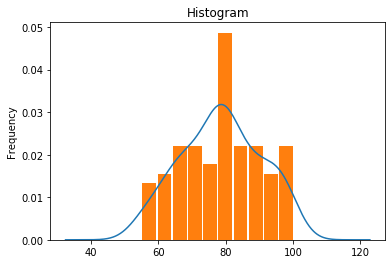

In [17]:
fig, ax = plt.subplots()  
lifespan['Singles'].plot.kde(ax=ax, legend=False, title='Histogram')  
lifespan['Singles'].plot.hist(density=True, ax=ax, legend=False, rwidth=0.9)  
plt.show()  

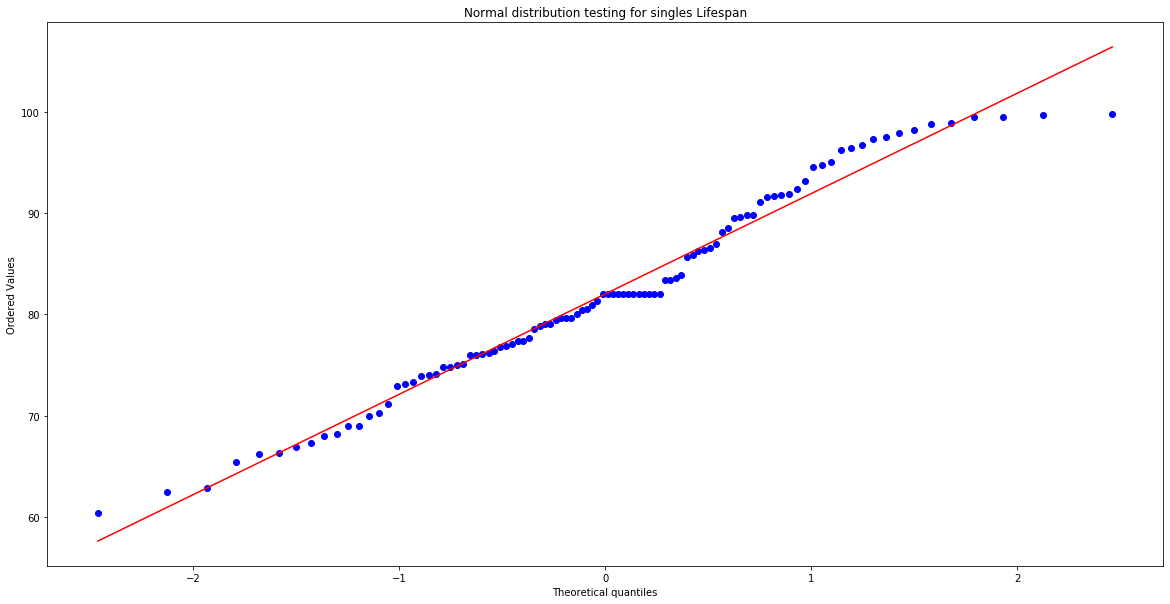

In [32]:
figure, ax = plt.subplots(num=1,figsize=(20,10))
# in dist replace with supposed distribution
stats.probplot(x=lifespan['Married'], plot=ax,dist=stats.norm)
plt.title("Normal distribution testing for singles Lifespan")
plt.show()

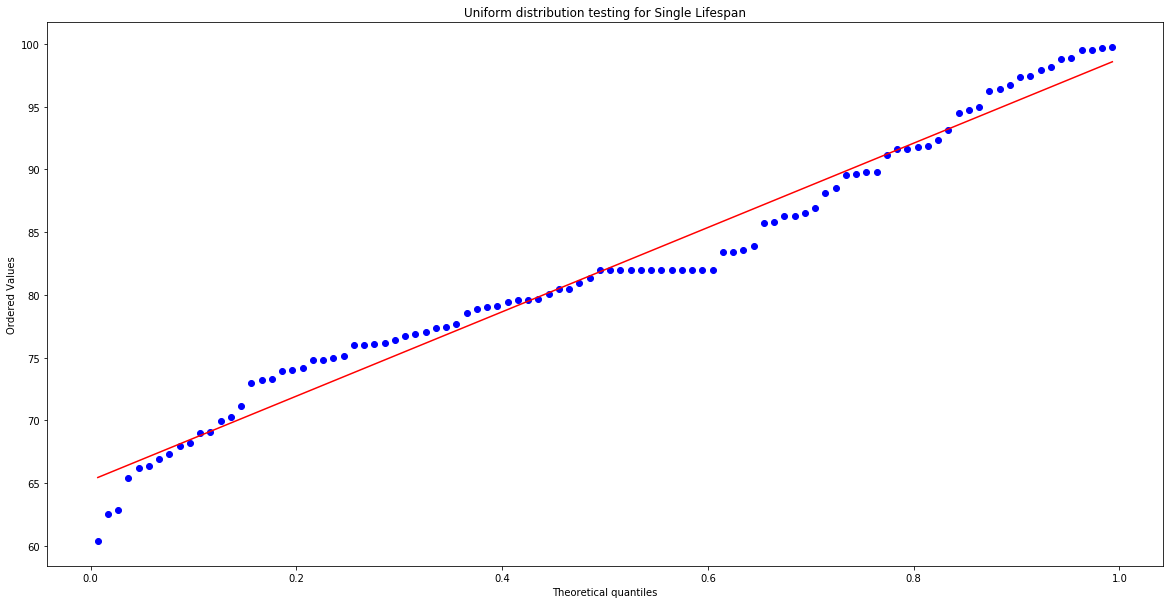

In [33]:
figure, ax = plt.subplots(num=1,figsize=(20,10))
# in dist replace with supposed distribution
stats.probplot(x=lifespan['Married'], plot=ax,dist=stats.uniform)
plt.title("Uniform distribution testing for Single Lifespan")
plt.show()

In [20]:
print('Skewness = ' + str(stats.skew(lifespan['Singles'])))  
print('Kurtosis = ' + str(stats.kurtosis(lifespan['Singles'])))  
if stats.skew(lifespan['Singles'])<0.5 and stats.skew(lifespan['Singles'])>-0.5:  
    print("As the skewness is between -0.5 and 0.5 it is not skewed")  
elif stats.skew(lifespan['Singles'])<-0.5 :   
    print("As the skewness is less than -0.5 it is negative skewed")  
else:  
    print("As the skewness is more than 0.5 it is positive skewed")  
           
if stats.kurtosis(lifespan['Singles'])<0.5 and stats.kurtosis(lifespan['Singles'])>-0.5:  
    print("As the kurtosis is between -0.5 and 0.5 it is Mesokurtic")  
elif stats.kurtosis(lifespan['Singles'])<-0.5 :   
    print("As the kurtosis is less than -0.5 it is Platykurtic")  
else:  
    print("As the skewness is more than 0.5 it is leptokurtic")   

Skewness = -0.06127247151830109
Kurtosis = -0.7871035947078031
As the skewness is between -0.5 and 0.5 it is not skewed
As the kurtosis is less than -0.5 it is Platykurtic


Summary

The plot for Married Lifespans models indicate it could be Normal. It is also Platykurtic and not skewed. 

The plot for singles Lifespans models indicate it could be Normal. It is also Platykurtic and not skewed.

It means there are some extreme events, but they would rather follow a normal ditribution than a uniform one.

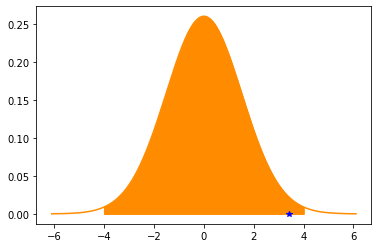

In [34]:
# d)

diff = lifespan['Married'] - lifespan['Singles']
X = diff.to_numpy()
std = X.std(ddof=1)
mean = X.mean()
x = np.linspace(-4*std/np.sqrt(len(X)), 4*std/np.sqrt(len(X)), 1000)
y = stats.t.pdf(x,df = len(X)-1, loc = 0, scale = std/np.sqrt(len(X)))

plt.plot(x,y, color = 'darkorange')

lower = stats.t.ppf(0.005,df = len(X)-1,loc = 0, scale = std/np.sqrt(len(X)))
upper = stats.t.ppf(0.995,df = len(X)-1,loc = 0, scale = std/np.sqrt(len(X)))  
                
xf = np.linspace(lower,upper, 100)
plt.fill_between(xf, stats.t.pdf(xf,df = len(X)-1, loc=0,scale= std/np.sqrt(len(X))), color = 'darkorange')

plt.plot(mean,0,'*',color='blue')
plt.show()

In [35]:
# e)
# Ther null is that the mean lifespan don't differ based on the civil status
diff = lifespan['Married'] - lifespan['Singles']
X = diff.to_numpy()
t=X.mean()/(X.std(ddof=1)/np.sqrt(len(X)))
prob = stats.t.cdf(t, df=len(X)-1)

print('p_value = ', 2*min(prob,1-prob))
print('The null can be rejected because it is smaller than 0.05. They do differ based on the civil status')

p_value =  0.028174045593655217
The null can be rejected because it is smaller than 0.05. They do differ from one year to another


In [36]:
# f)

#A F Test have to be used to check if there is a difference in standard deviations
prob = stats.f.sf(lifespan['Singles'].std(ddof=1)/lifespan['Married'].std(ddof=1),  dfn=len(lifespan['Singles'])-1, dfd=len(lifespan['Married'])-1)
print("p_value = ", prob*2)
print('The null can\'t be rejected because it is over 0.05')


p_value =  0.3862650993368661
The null can't be rejected because it is over 0.05


Assignment 5 (15%)
==

In [40]:
# a)

cars = pd.read_csv('cars.csv')
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,ford,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,gray,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,gray,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [42]:
data_crosstab = pd.crosstab(cars['color'], cars['brand'], margins = False) 
print(data_crosstab)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print('The null cant be rejected that they are independent for significant level')

brand   chevrolet  dodge  ford  gmc  hyundai  kia  nissan
color                                                    
black          60     80   300   14        0    3      87
blue           16     24    76    3        2    2      36
color:          0      0     4    0        0    0       0
gray           81    158   395   10        6    7     117
green           3      4    15    0        0    0       2
red            26     54   132    2        4    1      20
white         106    111   442   12        3    0      50
yellow          5      1    24    1        0    0       0


'p-value = 6.161657933566457e-08'

'degrees of freedom = 42'

The null can be rejected that they are independent for significant level


In [43]:
# b)

data_crosstab = pd.crosstab(cars['color'], cars['state'], margins = False) 
print(data_crosstab)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print('The null can be rejected that they are independent for significant level')

state   alabama  arizona  arkansas  california  colorado  connecticut  \
color                                                                   
black         5        5         3          34         3            6   
blue          2        2         2          12         2            3   
color:        0        0         0           1         0            0   
gray          6       13         0          70         5            8   
green         0        1         0           2         0            0   
red           1        2         2          14         2            3   
white         3       10         4          53         9            4   
yellow        0        0         1           4         0            1   

state   florida  georgia  idaho  illinois  ...  south carolina  tennessee  \
color                                      ...                              
black        64        9      0        32  ...              10          8   
blue         18        0      0       

'p-value = 0.00023322654470791487'

'degrees of freedom = 301'

The null can be rejected that they are independent for significant level


In [45]:
# c)

data_crosstab = pd.crosstab(cars['brand'], cars['state'], margins = False) 
print(data_crosstab)
chi2_stat, p_val, dof, ex2 = stats.chi2_contingency(data_crosstab, correction=False)
display("p-value = "+str(p_val), "degrees of freedom = "+str(dof))
print('The null cant be rejected that they are independent for significant level')

state      alabama  arizona  arkansas  california  colorado  connecticut  \
brand                                                                      
chevrolet        0        1         3          14         6            0   
dodge            2       10         0          32         4            2   
ford            11        6         8          84        10           11   
gmc              0        0         1          17         1            0   
hyundai          0        0         0           1         0            2   
kia              0        0         0           2         0            4   
nissan           4       16         0          40         0            6   

state      florida  georgia  idaho  illinois  ...  south carolina  tennessee  \
brand                                         ...                              
chevrolet       21       14      0         8  ...               1          4   
dodge           36       13      0        27  ...               8          

'p-value = 4.362063685944677e-198'

'degrees of freedom = 258'

The null cant be rejected that they are independent for significant level


Assignment 6 (10%)
==

In [46]:
# a)


0         (-0.001, 8000.0]
1         (-0.001, 8000.0]
2         (-0.001, 8000.0]
3       (20191.8, 27500.8]
4       (27500.8, 84900.0]
               ...        
2494      (-0.001, 8000.0]
2495     (8000.0, 14700.0]
2496     (8000.0, 14700.0]
2497     (8000.0, 14700.0]
2498     (8000.0, 14700.0]
Name: price, Length: 2499, dtype: category
Categories (5, interval[float64]): [(-0.001, 8000.0] < (8000.0, 14700.0] < (14700.0, 20191.8] < (20191.8, 27500.8] < (27500.8, 84900.0]]

In [27]:
# b)


Assignment 7 (10%)
==